**About the dataset**

1. id : unique id for a news article
2. title : the title of a news article
3. author : author of news article
4. text : the text of the article(could be incomplete)
5. label : a label that marks whether the news article is real or fake


real news--> 0

fake news --> 1

---

Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
  # printing the stopwords in English

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Collection & Data Pre-processing

In [4]:
# loading the datasets to a panda DataFrame

news_training_dataset = pd.read_csv('/content/train.csv')
news_test_dataset = pd.read_csv('/content/test.csv')

In [5]:
news_training_dataset.shape

(20800, 5)

In [6]:
news_test_dataset.shape

(5200, 4)

In [7]:
news_training_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
news_training_dataset.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [9]:
news_test_dataset.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [10]:
news_test_dataset.tail()

,id,title,author,text
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...
5199,25999,"Awkward Sex, Onscreen and Off - The New York T...",Teddy Wayne,Perhaps you’ve seen the new TV series whose pi...


In [11]:
# counting the number of missing values in the training dataset

news_training_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [12]:
# counting the number of missing values in the test dataset

news_test_dataset.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [13]:
# replacing the null value with empty string

news_training_dataset = news_training_dataset.fillna('')
news_test_dataset = news_test_dataset.fillna('')

In [14]:
news_training_dataset.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [15]:
news_test_dataset.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [16]:
# merging the author name & news title

news_training_dataset['content'] = news_training_dataset['author'] + ' ' + news_training_dataset['title']
news_test_dataset['content'] = news_test_dataset['author'] + ' ' + news_test_dataset['title']

In [17]:
print(news_training_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [18]:
print(news_test_dataset['content'])

0       David Streitfeld Specter of Trump Loosens Tong...
1        Russian warships ready to strike terrorists n...
2       Common Dreams #NoDAPL: Native American Leaders...
3       Daniel Victor Tim Tebow Will Attempt Another C...
4       Truth Broadcast Network Keiser Report: Meme Wa...
                              ...                        
5195    Jody Rosen The Bangladeshi Traffic Jam That Ne...
5196    Sheryl Gay Stolberg John Kasich Signs One Abor...
5197    Mike McPhate California Today: What, Exactly, ...
5198     300 US Marines To Be Deployed To Russian Bord...
5199    Teddy Wayne Awkward Sex, Onscreen and Off - Th...
Name: content, Length: 5200, dtype: object


In [19]:
# separating the data  & label for training dataset

X_train = news_training_dataset.drop('label' , axis=1)
Y_train = news_training_dataset['label']

In [20]:
print(X_train)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [21]:
print(Y_train)

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


In [22]:
print(news_test_dataset)

         id                                              title  \
0     20800  Specter of Trump Loosens Tongues, if Not Purse...   
1     20801  Russian warships ready to strike terrorists ne...   
2     20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3     20803  Tim Tebow Will Attempt Another Comeback, This ...   
4     20804                    Keiser Report: Meme Wars (E995)   
...     ...                                                ...   
5195  25995  The Bangladeshi Traffic Jam That Never Ends - ...   
5196  25996  John Kasich Signs One Abortion Bill in Ohio bu...   
5197  25997  California Today: What, Exactly, Is in Your Su...   
5198  25998  300 US Marines To Be Deployed To Russian Borde...   
5199  25999  Awkward Sex, Onscreen and Off - The New York T...   

                       author  \
0            David Streitfeld   
1                               
2               Common Dreams   
3               Daniel Victor   
4     Truth Broadcast Network   
...      

In [23]:
print(news_test_dataset.columns)


Index(['id', 'title', 'author', 'text', 'content'], dtype='object')


In [24]:
X_test = news_test_dataset

**Stemming Procedure :**

Stemming is the process of reducing a Word to its Root Word.

example:
actor, actress, acting ---> act

In [25]:
port_stem = PorterStemmer()

In [26]:
def stemming(content):
    #removing all the other letters,numbers or symbols or anything else and replace them with space(' ') except (a-z) & (A-Z)
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)

     # convert all to lower case
    stemmed_content = stemmed_content.lower()

    # all will be split and turned into a list
    stemmed_content = stemmed_content.split()

    # stemming process except all the stopwords
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [27]:
news_training_dataset['content'] = news_training_dataset['content'].apply(stemming)

In [28]:
news_test_dataset['content'] = news_test_dataset['content'].apply(stemming)

In [29]:
print(news_training_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [30]:
print(news_test_dataset['content'])

0       david streitfeld specter trump loosen tongu pu...
1       russian warship readi strike terrorist near al...
2       common dream nodapl nativ american leader vow ...
3       daniel victor tim tebow attempt anoth comeback...
4        truth broadcast network keiser report meme war e
                              ...                        
5195    jodi rosen bangladeshi traffic jam never end n...
5196    sheryl gay stolberg john kasich sign one abort...
5197    mike mcphate california today exactli sushi ne...
5198                us marin deploy russian border norway
5199        teddi wayn awkward sex onscreen new york time
Name: content, Length: 5200, dtype: object


In [31]:
X_train = news_training_dataset['content'].values
Y_train = news_training_dataset['label'].values

In [32]:
X_test = news_test_dataset['content'].values

In [33]:
print(X_train)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [34]:
print(Y_train)

[1 0 1 ... 0 1 1]


In [35]:
Y_train.shape

(20800,)

In [36]:
# converting textual data into numerical data for training data

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)

In [37]:
# converting textual data into numerical data for test data

#vectorizer = TfidfVectorizer()
#vectorizer.fit(X_test)

X_test= vectorizer.transform(X_test)

In [38]:
print(X_train)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [39]:
print(X_test)


  (0, 16996)	0.08864595251126647
  (0, 16088)	0.3205594987716609
  (0, 15582)	0.11032513315099028
  (0, 15368)	0.38547947461491155
  (0, 15295)	0.08697876504498342
  (0, 14605)	0.3970837204511862
  (0, 14591)	0.34467447913058513
  (0, 13850)	0.32956045112215354
  (0, 12030)	0.38547947461491155
  (0, 10306)	0.08568694729690247
  (0, 8842)	0.36912420870480717
  (0, 3623)	0.209228842739656
  (1, 16473)	0.4921981982038152
  (1, 15142)	0.3550835494981517
  (1, 14603)	0.35559908473568963
  (1, 13048)	0.3052969733971102
  (1, 12300)	0.3838422559012773
  (1, 10219)	0.37818137822242154
  (1, 347)	0.3487744590431239
  (2, 16746)	0.3016628915147435
  (2, 16354)	0.2909537422615255
  (2, 14457)	0.30637021801826614
  (2, 11598)	0.21447077225895875
  (2, 10419)	0.35982822390508096
  (2, 10176)	0.3194727535249622
  :	:
  (5196, 5884)	0.2500401085058591
  (5196, 1517)	0.19940396943572683
  (5196, 41)	0.2656503884474958
  (5197, 16996)	0.11797520134546996
  (5197, 15336)	0.33413616793311524
  (5197, 152

Splitting the dataset into **Training Data** & **Test Data**

In [40]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Training the Model : **Logistic Regression**

In [41]:
model = LogisticRegression()

In [42]:
model.fit(X_train, Y_train)

LogisticRegression()

Evaluation: Accuracy Score


In [43]:
# accuracy score on the training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [44]:
print('Accuracy Score of the Training Data : ' , training_data_accuracy)

Accuracy Score of the Training Data :  0.9883173076923077


In [45]:
# accuracy score on the test data

# X_test_prediction = model.predict(X_test)
# test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [46]:
#print('Accuracy Score of the Test Data : ' , test_data_accuracy)

Making a Predictive System

In [76]:
X_new = X_test[2]
prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')


[1]
The news is Fake


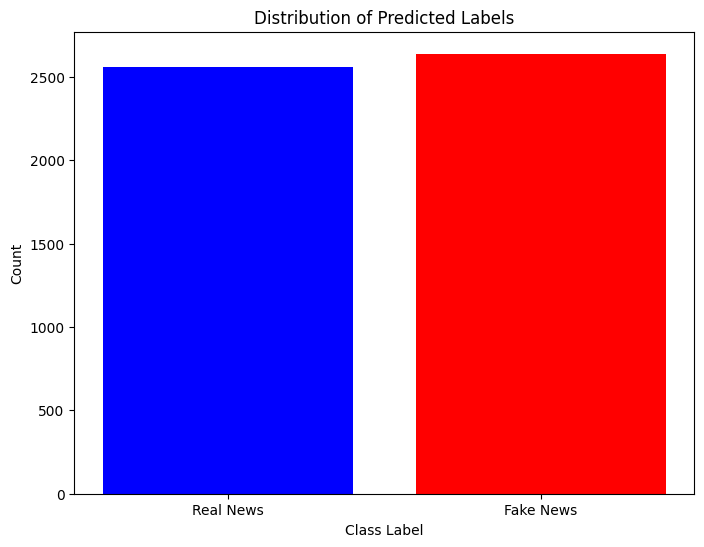

In [64]:
import numpy as np

# Assuming X_new contains multiple samples
predictions = model.predict(X_test)

# Count the number of occurrences of each class
unique, counts = np.unique(predictions, return_counts=True)
prediction_counts = dict(zip(unique, counts))

# Plotting the distribution
plt.figure(figsize=(8, 6))
plt.bar(prediction_counts.keys(), prediction_counts.values(), color=['blue', 'red'])
plt.title('Distribution of Predicted Labels')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['Real News', 'Fake News'])  # Assuming binary classification
plt.show()


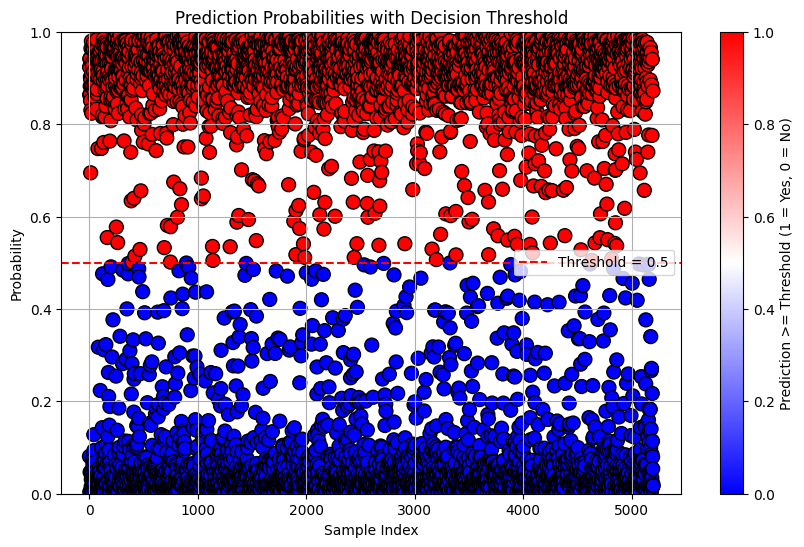

In [82]:
import matplotlib.pyplot as plt

# Predicting probabilities for the positive class (e.g., "Fake News")
prediction_probabilities = model.predict_proba(X_test)[:, 1]

# Define the decision threshold
threshold = 0.5

# Create a scatter plot with colors based on the threshold
plt.figure(figsize=(10, 6))
plt.scatter(range(len(prediction_probabilities)), prediction_probabilities,
            c=(prediction_probabilities >= threshold), cmap='bwr', edgecolor='k', s=100)
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.title('Prediction Probabilities with Decision Threshold')
plt.xlabel('Sample Index')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.colorbar(label='Prediction >= Threshold (1 = Yes, 0 = No)')
plt.grid(True)
plt.legend()
plt.show()
